In [ ]:
# Evan Pradipta Hardinatha - 1103204160
from google.colab import drive
#import library colab untuk integrasi drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#import library pandas
#path gdrive
file_path = "/content/drive/MyDrive/Datasets/EconomiesOfScale.csv"

# baca csv
df = pd.read_csv(file_path)

# tampilkan head df
print(df.head())

   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [ ]:
df.head(17)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [ ]:
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


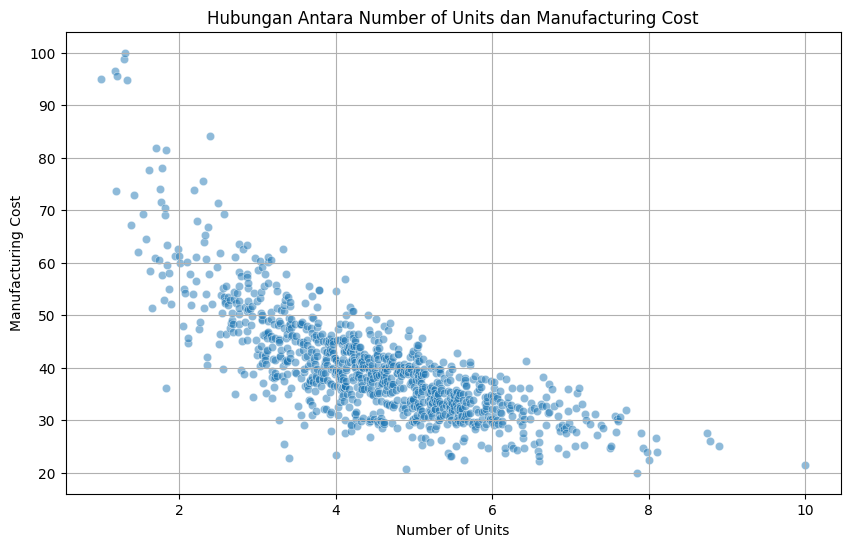

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#import seaborn, matplotlib
#pembuatan figure untuk df number of units dan manufactur cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Number of Units", y="Manufacturing Cost", alpha=0.5)
plt.title("Hubungan Antara Number of Units dan Manufacturing Cost")
plt.grid(True)
plt.show()

In [ ]:
X = df[["Number of Units"]]  # Kolom label (variabel independen)
y = df["Manufacturing Cost"]  # Kolom target (variabel dependen)

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#import for modelling

Degree 1 Polynomial MSE: 47.22
Degree 2 Polynomial MSE: 37.57
Degree 3 Polynomial MSE: 35.07
Degree 4 Polynomial MSE: 34.41
Degree 5 Polynomial MSE: 34.08
Degree 6 Polynomial MSE: 33.89
Degree 7 Polynomial MSE: 33.78
Degree 8 Polynomial MSE: 33.70
Degree 9 Polynomial MSE: 33.61
Degree 10 Polynomial MSE: 33.41
Degree 11 Polynomial MSE: 33.13
Degree 12 Polynomial MSE: 33.05


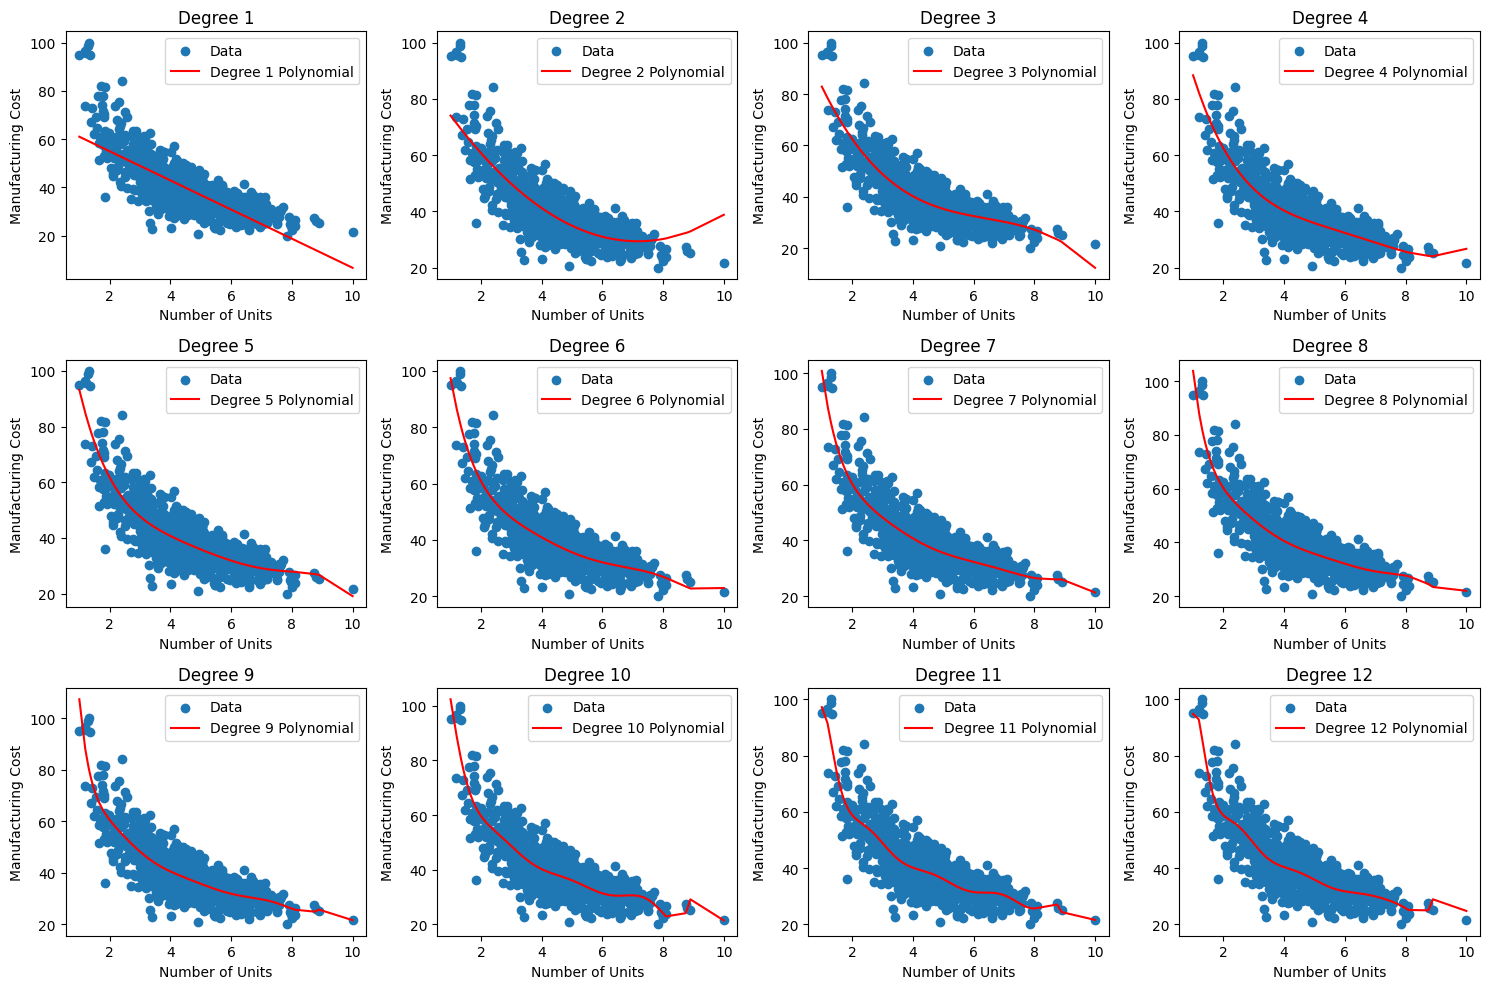

In [ ]:

# Mengambil kolom "Number of Units" sebagai fitur (X) dan kolom "Manufacturing Cost" sebagai target (y)
X = df[["Number of Units"]]
y = df["Manufacturing Cost"]

# Menginisialisasi array untuk menyimpan nilai MSE (Mean Squared Error) untuk setiap derajat polinomial
mse_values = []

# Mengatur ukuran subplot (3 baris, 4 kolom) untuk tabel
plt.figure(figsize=(15, 10))

# Melakukan regresi polinomial dengan derajat 1 hingga 12
for degree in range(1, 13):
    # Membuat objek PolynomialFeatures dengan derajat tertentu
    poly = PolynomialFeatures(degree=degree)

    # Mengubah fitur (X) menjadi bentuk polinomial
    X_poly = poly.fit_transform(X)

    # Membuat model regresi linear
    model = LinearRegression()

    # Melatih model dengan data polinomial
    model.fit(X_poly, y)

    # Memprediksi nilai "Manufacturing Cost" dengan model yang telah dilatih
    y_pred = model.predict(X_poly)

    # Menghitung Mean Squared Error (MSE) dan menyimpannya dalam array mse_values
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Menyusun subplot dalam bentuk tabel
    plt.subplot(3, 4, degree)
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_pred, color='red', label='Degree ' + str(degree) + ' Polynomial')
    plt.title('Degree ' + str(degree))
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.legend()

# Menampilkan nilai MSE untuk setiap derajat polinomial
for degree, mse in enumerate(mse_values, 1):
    print(f'Degree {degree} Polynomial MSE: {mse:.2f}')

# Menyesuaikan layout subplot
plt.tight_layout()
plt.show()
